Using TensorFlow backend.


Train on 186 samples, validate on 62 samples
Epoch 1/50
186/186 [==============================] - 27s 145ms/step - loss: 1.4625 - acc: 0.3387 - val_loss: 1.3797 - val_acc: 0.4516
Epoch 2/50
186/186 [==============================] - 26s 140ms/step - loss: 1.3674 - acc: 0.3118 - val_loss: 1.3302 - val_acc: 0.4516
Epoch 3/50
186/186 [==============================] - 26s 138ms/step - loss: 1.3287 - acc: 0.3763 - val_loss: 1.3084 - val_acc: 0.4516
Epoch 4/50
186/186 [==============================] - 26s 140ms/step - loss: 1.3103 - acc: 0.3925 - val_loss: 1.3263 - val_acc: 0.4516
Epoch 5/50
186/186 [==============================] - 26s 140ms/step - loss: 1.2436 - acc: 0.3871 - val_loss: 1.2392 - val_acc: 0.3226
Epoch 6/50
186/186 [==============================] - 26s 142ms/step - loss: 1.2039 - acc: 0.4570 - val_loss: 1.2610 - val_acc: 0.2419
Epoch 7/50
186/186 [==============================] - 26s 140ms/step - loss: 1.1823 - acc: 0.4516 - val_loss: 1.1910 - val_acc: 0.3387
Epoch 8/50

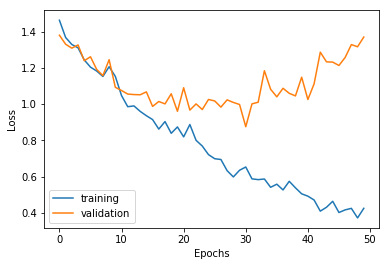

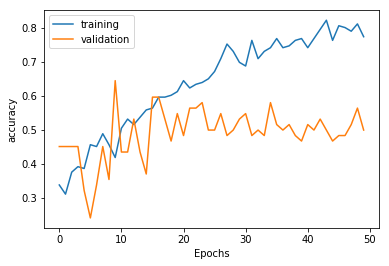

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
from keras.utils import np_utils
DATADIR = "C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/project_data"
CATEGORIES = ["Normal", "DR1", "DR2", "DR3"]

img_size = 100
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_img = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_img, class_num])
            except Exception as e:
                pass
            
            
create_training_data()

from keras import backend as k
import random
random.shuffle(training_data)

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
            
from keras.utils import np_utils
x = np.array(x).reshape(-1, img_size, img_size, 3)
x = x/255.0
y=np_utils.to_categorical(y, 4) 
      
         
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y)

from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
epochs = 50
batch_size = 32
filter_size = 3
pool_size = 2
num_filters = 64


model = Sequential()
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model.predict(x_val)
y_pred = model.predict_classes(x_val)
target_names = ['class 0(Normal)', 'class 1(DR1)', 'class 2(DR2)', 'Class 3(DR3)']
print(classification_report(np.argmax(y_val, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(y_val, axis=1), y_pred))

                 precision    recall  f1-score   support

class 0(Normal)       0.92      0.75      0.83        16
   class 1(DR1)       0.35      0.75      0.48         8
   class 2(DR2)       0.63      0.43      0.51        28
   Class 3(DR3)       0.08      0.10      0.09        10

      micro avg       0.50      0.50      0.50        62
      macro avg       0.50      0.51      0.48        62
   weighted avg       0.58      0.50      0.52        62

[[12  3  1  0]
 [ 1  6  1  0]
 [ 0  4 12 12]
 [ 0  4  5  1]]
